# 1. Naive Bayes

For this problem, first you have create a user-defined fuction for Bernoulli naive Bayes. Then, train a classifier using this function.

For this problem, use the MAGIC Gamma Telescope data set.

The included variabes in this dataset are as follows. 
1. fLength: continuous # major axis of ellipse [mm] 
2. fWidth: continuous # minor axis of ellipse [mm] 
3. fSize: continuous # 10-log of sum of content of all pixels [in #phot] 
4. fConc: continuous # ratio of sum of two highest pixels over fSize [ratio] 
5. fConc1: continuous # ratio of highest pixel over fSize [ratio] 
6. fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm] 
7. fM3Long: continuous # 3rd root of third moment along major axis [mm] 
8. fM3Trans: continuous # 3rd root of third moment along minor axis [mm] 
9. fAlpha: continuous # angle of major axis with vector to origin [deg] 
10. fDist: continuous # distance from origin to center of ellipse [mm] 
11. class: g,h # gamma (signal), hadron (background)

In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

# data load
magic=pd.read_csv('https://drive.google.com/uc?export=download&id=1AoCh22pmLHhdQtYdYUAJJqOCwF9obgVO', sep='\t')

X=magic[magic.columns[:-1]].values
y=magic['class'].values

# data partition
trainX,testX,trainY,testY=train_test_split(X,y,stratify=y,test_size=0.2,random_state=11)

(1) Complete the following user-defined function for Bernoulli naive Bayes. 

In [6]:

def BNB(X,y,alpha=1):
    ######## BERNOULLI NAIVE BAYES ########
    # INPUT 
    # X: n by p array (n=# of observations, p=# of input variables)
    # y: output (len(y)=n, categorical variable)
    # alpha: smoothing paramater
    # OUTPUT
    # pmatrix: 2-D array(list) of size c by p with the probability p_ij=P(x_j=1|y_j=i) (i=class, j=feature) 
    #         where c is number of unique classes in y
        
    # TODO: Bernoulli NB
    
    


    Xbin=(X>=X.mean(0))*1
    df =pd.DataFrame(Xbin)

    df1 =pd.DataFrame(y)
    df1 = df1.replace('g', np.nan)
    df1 = df1.dropna(axis = 0)

    ph = len(df1.index) / len(y) #probability of g in total y-medium
    pg = 1 -ph            #probability of g in total y-medium

    df2 = pd.DataFrame(y)

    g_one = []          #the number of y['g'] and x=1
    h_one = []          #the number of y['h'] and x=1

    for i in range(len(df.columns)):
        count_g1 = 0
        for j in range (len(df.index)):
            if(df[i][j] == 1 and df2[0][j] == 'g'):
                count_g1+=1
        g_one.append(count_g1)

    for i in range(len(df.columns)):
        count_h1 = 0
        for j in range (len(df.index)):
            if(df[i][j] == 1 and df2[0][j] == 'h'):
                count_h1+=1
        h_one.append(count_h1)


    column = []
    for i in range(10):
        column.append(i)

    pmatrix = pd.DataFrame(index = [['g', 'h']], columns = column)

    
    for i in range(10):
        pmatrix[i][0] = (g_one[i] + alpha) / (pg*len(y) + alpha*2)
        pmatrix[i][1] = (h_one[i] + alpha) / (ph*len(y) + alpha*2)
        
    return pmatrix
BNB(X,y,alpha=1)

,0,1,2,3,4,5,6,7,8,9
g,0.286849,0.265364,0.403519,0.445922,0.432301,0.658748,0.607832,0.501297,0.232933,0.466677
h,0.462182,0.400897,0.473842,0.460987,0.453513,0.530194,0.507474,0.500448,0.678326,0.530344


(2) First, you have to binarize training set (trainX) of MAGIC Gamma Telescope data set. Each column is converted to binary variable based on the average value. If a value is greater than average, set a value as 1. Otherwise, set a value as 0. Then, using new binarized dataset, calculate $p_{ij}$ (i=class,j=feature) with alpha=1. 

In [5]:
BNB(trainX,trainY,alpha=1)

,0,1,2,3,4,5,6,7,8,9
g,0.283948,0.265707,0.400993,0.447912,0.433624,0.660418,0.610762,0.504054,0.235103,0.460681
h,0.460202,0.398729,0.473281,0.463191,0.453475,0.527093,0.508408,0.49701,0.674701,0.534193


(3) Based on the calculated p_ij, calculate probability of class g for each test sample (testX) and calculate accuracy for testX with varying cutoff (To binarize testX, use the mean of trainX). Prior probabilities of classes are proportional to ratios of classes in training set. cutoff ∈{0.1,0.15,0.2,0.25,…,0.95}. Draw a line plot (x=cutoff, y=accuracy). 

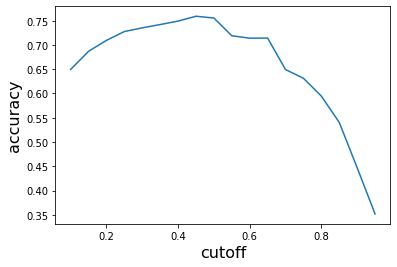

In [3]:
testXbin=(testX>trainX.mean(0))*1
p_matrix=BNB(trainX>trainX.mean(0)*1,trainY)

df1 =pd.DataFrame(y)
df1 = df1.replace('g', np.nan)
df1 = df1.dropna(axis = 0)

ph = len(df1.index) / len(y)     #probability of g in total y-medium
pg = 1 -ph                       #probability of g in total y-medium

cutoff = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
proY = []

for i in range(len(testXbin)):      #calculate probability using Bernoui naive model
    bn_g=1
    bn_h=1
    for j in range(len(testXbin[0])):
        if(testXbin[i][j] == 1): 
            bn_g*=p_matrix[j][0]
            bn_h*=p_matrix[j][1]
        else:
            bn_g*=(1-p_matrix[j][0])    
            bn_h*=(1-p_matrix[j][1])
    bn_g=bn_g*pg                       #calculate #P(1|g)=(p(g|1)*p(1))/p(g)
    bn_h=bn_h*ph                       #P(1|h)=(p(h|1)*p(1))/p(g)
    proY.append(bn_g/(bn_g+bn_h))      #P(1)=P(g|1)+P(h|1)
    
list_a=[]
for i in cutoff:
    list1 = []                                  #Determine value to each cutoff
    count1=0
    for j in range(len(testY)):                 #predict g or h by probability y and cutoff
        if i <= proY[j]:
            list1.append('g')
        else:
            list1.append('h')
            
    for k in range(len(testY)):
        if list1[k] == testY[k]:            
            count1+=1    
    accuracy=count1/len(testY)                  #calculate accuracy
    list_a.append(accuracy)

plt.plot(cutoff,list_a)
plt.xlabel('cutoff' , fontsize = 16)
plt.ylabel('accuracy', fontsize = 16)
plt.show()


## 2. Decision Tree
The aim of the given data set is to predict annual income of people based on the following factors.
-	age:  the age of an individual
-	capital-gain: capital gains for an individual
-	capital-loss: capital loss for an individual
-	hours-per-week: the hours an individual has reported to work per week
-	sex: 1 if male, 0 if female
-	native-country: 1 if USA, 0 if others
-	workclass_[#]: 1 if an individual belongs to workclass # otherwise 0 (eg. Workclass_Private is 1 if an individual works for private companies)
-	education_[#]: 1 if an individual’s education level is # otherwise 0(education level: Graduate > 4-year university > “<4-year university” > High school > “<High school” > Preschool)
-	marital-status_[#] 1 if an individual’s marital status is # otherwise 0 (Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces)
-	occupation_[#]: 1 if an individual’s occupation is # otherwise 0. 
-	race_[#]: 1 if an individual’s race is #, otherwise 0

Target is ‘income’ (“>50K” or “<=50K”)

fnlwgt represents the number of people the census believes the entry represents, which is not used in training. 


In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

%matplotlib inline
income=pd.read_csv('https://drive.google.com/uc?export=download&id=13HzPLzSDfSwOhvpYOrRSWPMoXzGwYQPx')

(1) Train a decision tree with the setting that max_depth=3, min_samples_split=100, min_samples_leaf=50 using entropy. Then, calculate overall accuracy, accuracy of class ">50K", and accuracy of class "<=50K".

In [11]:
x = income.drop(['fnlwgt','income'],axis=1).values
y=income['income']

t1 = DecisionTreeClassifier(criterion='entropy',max_depth=3, min_samples_split=100, min_samples_leaf=50) 
t1.fit(x, y)

y_pred = t1.predict(x)

print('accuracy is' , t1.score(x, y))

df=pd.DataFrame(income)
up_index=df[df['income']=='>50K'].index
down_index=df[df['income']=='<=50K'].index
up_df=df.drop(down_index) #seperate whole data 'income' for 'income'>50k
down_df=df.drop(up_index) #seperate whole data 'income' for 'income'<50k

X_up=up_df.drop(['fnlwgt','income'],axis=1).values #seperate data ' X' for 'income'>50k
X_down=down_df.drop(['fnlwgt','income'],axis=1).values #seperate data ' X' for 'income'<=50k
y_up=up_df['income']   #seperate data ' y' for 'income'>50k
y_down=down_df['income']  #seperate data ' y' for 'income'<=50k
a_up=accuracy_score(t1.predict(X_up),y_up)
a_down=accuracy_score(t1.predict(X_down),y_down)

print('accuracy of ">50K" is', a_up)
print('accuracy of "<=50K" is', a_down)


type(up_df)

accuracy is 0.7975454131128329
accuracy of ">50K" is 0.18980392156862744
accuracy of "<=50K" is 0.9990896479972255


pandas.core.frame.DataFrame

(3) Draw the trained tree

[Text(558.0, 761.04, 'X[21] <= 0.5\nentropy = 0.81\nsamples = 30718\nvalue = [23068, 7650]\nclass = <=50K'),
 Text(279.0, 543.6, 'X[2] <= 7073.5\nentropy = 0.362\nsamples = 16379\nvalue = [15250, 1129]\nclass = <=50K'),
 Text(139.5, 326.15999999999997, 'X[0] <= 27.5\nentropy = 0.295\nsamples = 16079\nvalue = [15241, 838]\nclass = <=50K'),
 Text(69.75, 108.72000000000003, 'entropy = 0.06\nsamples = 6155\nvalue = [6112, 43]\nclass = <=50K'),
 Text(209.25, 108.72000000000003, 'entropy = 0.403\nsamples = 9924\nvalue = [9129, 795]\nclass = <=50K'),
 Text(418.5, 326.15999999999997, 'X[17] <= 0.5\nentropy = 0.194\nsamples = 300\nvalue = [9, 291]\nclass = >50K'),
 Text(348.75, 108.72000000000003, 'entropy = 0.094\nsamples = 248\nvalue = [3, 245]\nclass = >50K'),
 Text(488.25, 108.72000000000003, 'entropy = 0.516\nsamples = 52\nvalue = [6, 46]\nclass = >50K'),
 Text(837.0, 543.6, 'X[2] <= 5095.5\nentropy = 0.994\nsamples = 14339\nvalue = [7818, 6521]\nclass = <=50K'),
 Text(697.5, 326.159999999

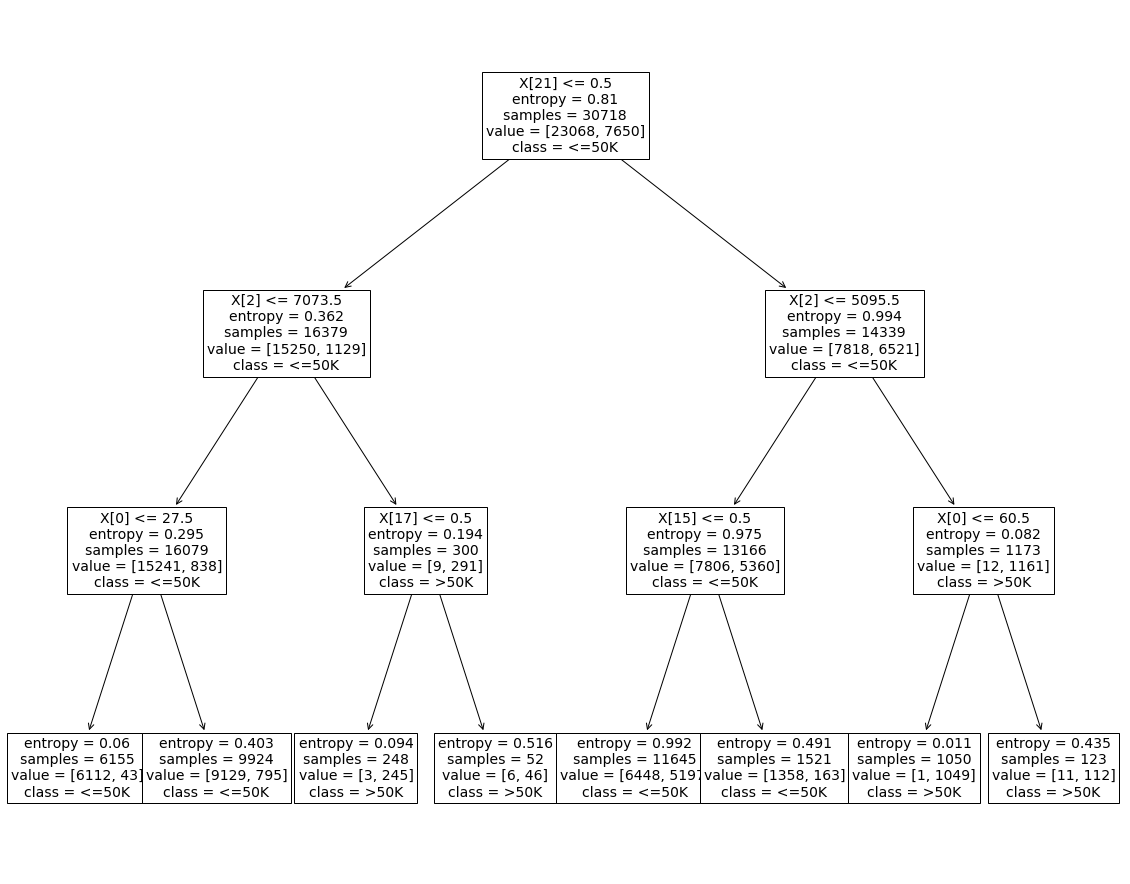

In [3]:
fig=plt.figure(figsize=(20,16))
tree.plot_tree(t1, class_names = ["<=50K", ">50K"] ,fontsize = 14)

(6) Train a new tree by changing a metric for finding split rules from entropy to gini impurity and compare two models in terms of the performance of the models and the generated rules

In [5]:
x = income.drop(['fnlwgt','income'],axis=1).values
y=income['income']


depth = [3 ,4, 5, 6, 7, 8]
leaf = [30, 40, 50, 60, 70, 80]

df = pd.DataFrame(columns = depth, index = leaf)

for i in depth:     #make a lots model changing min_sample or depth and print models result to choose model
    for j in leaf:
        dt_clf = DecisionTreeClassifier(max_depth=i, min_samples_split=100, min_samples_leaf=j)
        dt_clf.fit(x, y)

        y_pred = dt_clf.predict(x)

        score = dt_clf.score(x, y)
        
        df[i][j] = score

df  

,3,4,5,6,7,8
30,0.814799,0.815515,0.823393,0.843968,0.846051,0.850413
40,0.814799,0.815515,0.822905,0.843479,0.845563,0.849925
50,0.814799,0.815515,0.822905,0.843479,0.845563,0.84999
60,0.814799,0.815418,0.822807,0.843382,0.845465,0.849893
70,0.814799,0.815418,0.822807,0.843382,0.845465,0.849274
80,0.814799,0.815418,0.822514,0.843089,0.845172,0.848981


In [6]:
#choose parameters and make a new model by result

t2 = DecisionTreeClassifier(max_depth=8, min_samples_split=100, min_samples_leaf=30)
fig=plt.figure(figsize=(20,16))
t2.fit(x, y)

y_pred = t2.predict(x)
print(t2.score(x, y))


0.8504134383748942


<Figure size 1440x1152 with 0 Axes>

[Text(3353.756067961165, 4107.2, 'X[21] <= 0.5\ngini = 0.374\nsamples = 30718\nvalue = [23068, 7650]\nclass = <=50K'),
 Text(1848.7135922330096, 3624.0, 'X[2] <= 7073.5\ngini = 0.128\nsamples = 16379\nvalue = [15250, 1129]\nclass = <=50K'),
 Text(1367.9126213592233, 3140.8, 'X[4] <= 43.5\ngini = 0.099\nsamples = 16079\nvalue = [15241, 838]\nclass = <=50K'),
 Text(785.5339805825242, 2657.6, 'X[3] <= 2218.5\ngini = 0.056\nsamples = 12755\nvalue = [12384, 371]\nclass = <=50K'),
 Text(731.3592233009708, 2174.4, 'X[16] <= 0.5\ngini = 0.053\nsamples = 12702\nvalue = [12359, 343]\nclass = <=50K'),
 Text(433.3980582524272, 1691.1999999999998, 'X[0] <= 33.5\ngini = 0.043\nsamples = 12226\nvalue = [11958, 268]\nclass = <=50K'),
 Text(216.6990291262136, 1208.0, 'X[0] <= 26.5\ngini = 0.013\nsamples = 7105\nvalue = [7057, 48]\nclass = <=50K'),
 Text(108.3495145631068, 724.7999999999997, 'X[13] <= 0.5\ngini = 0.005\nsamples = 4882\nvalue = [4870, 12]\nclass = <=50K'),
 Text(54.1747572815534, 241.599

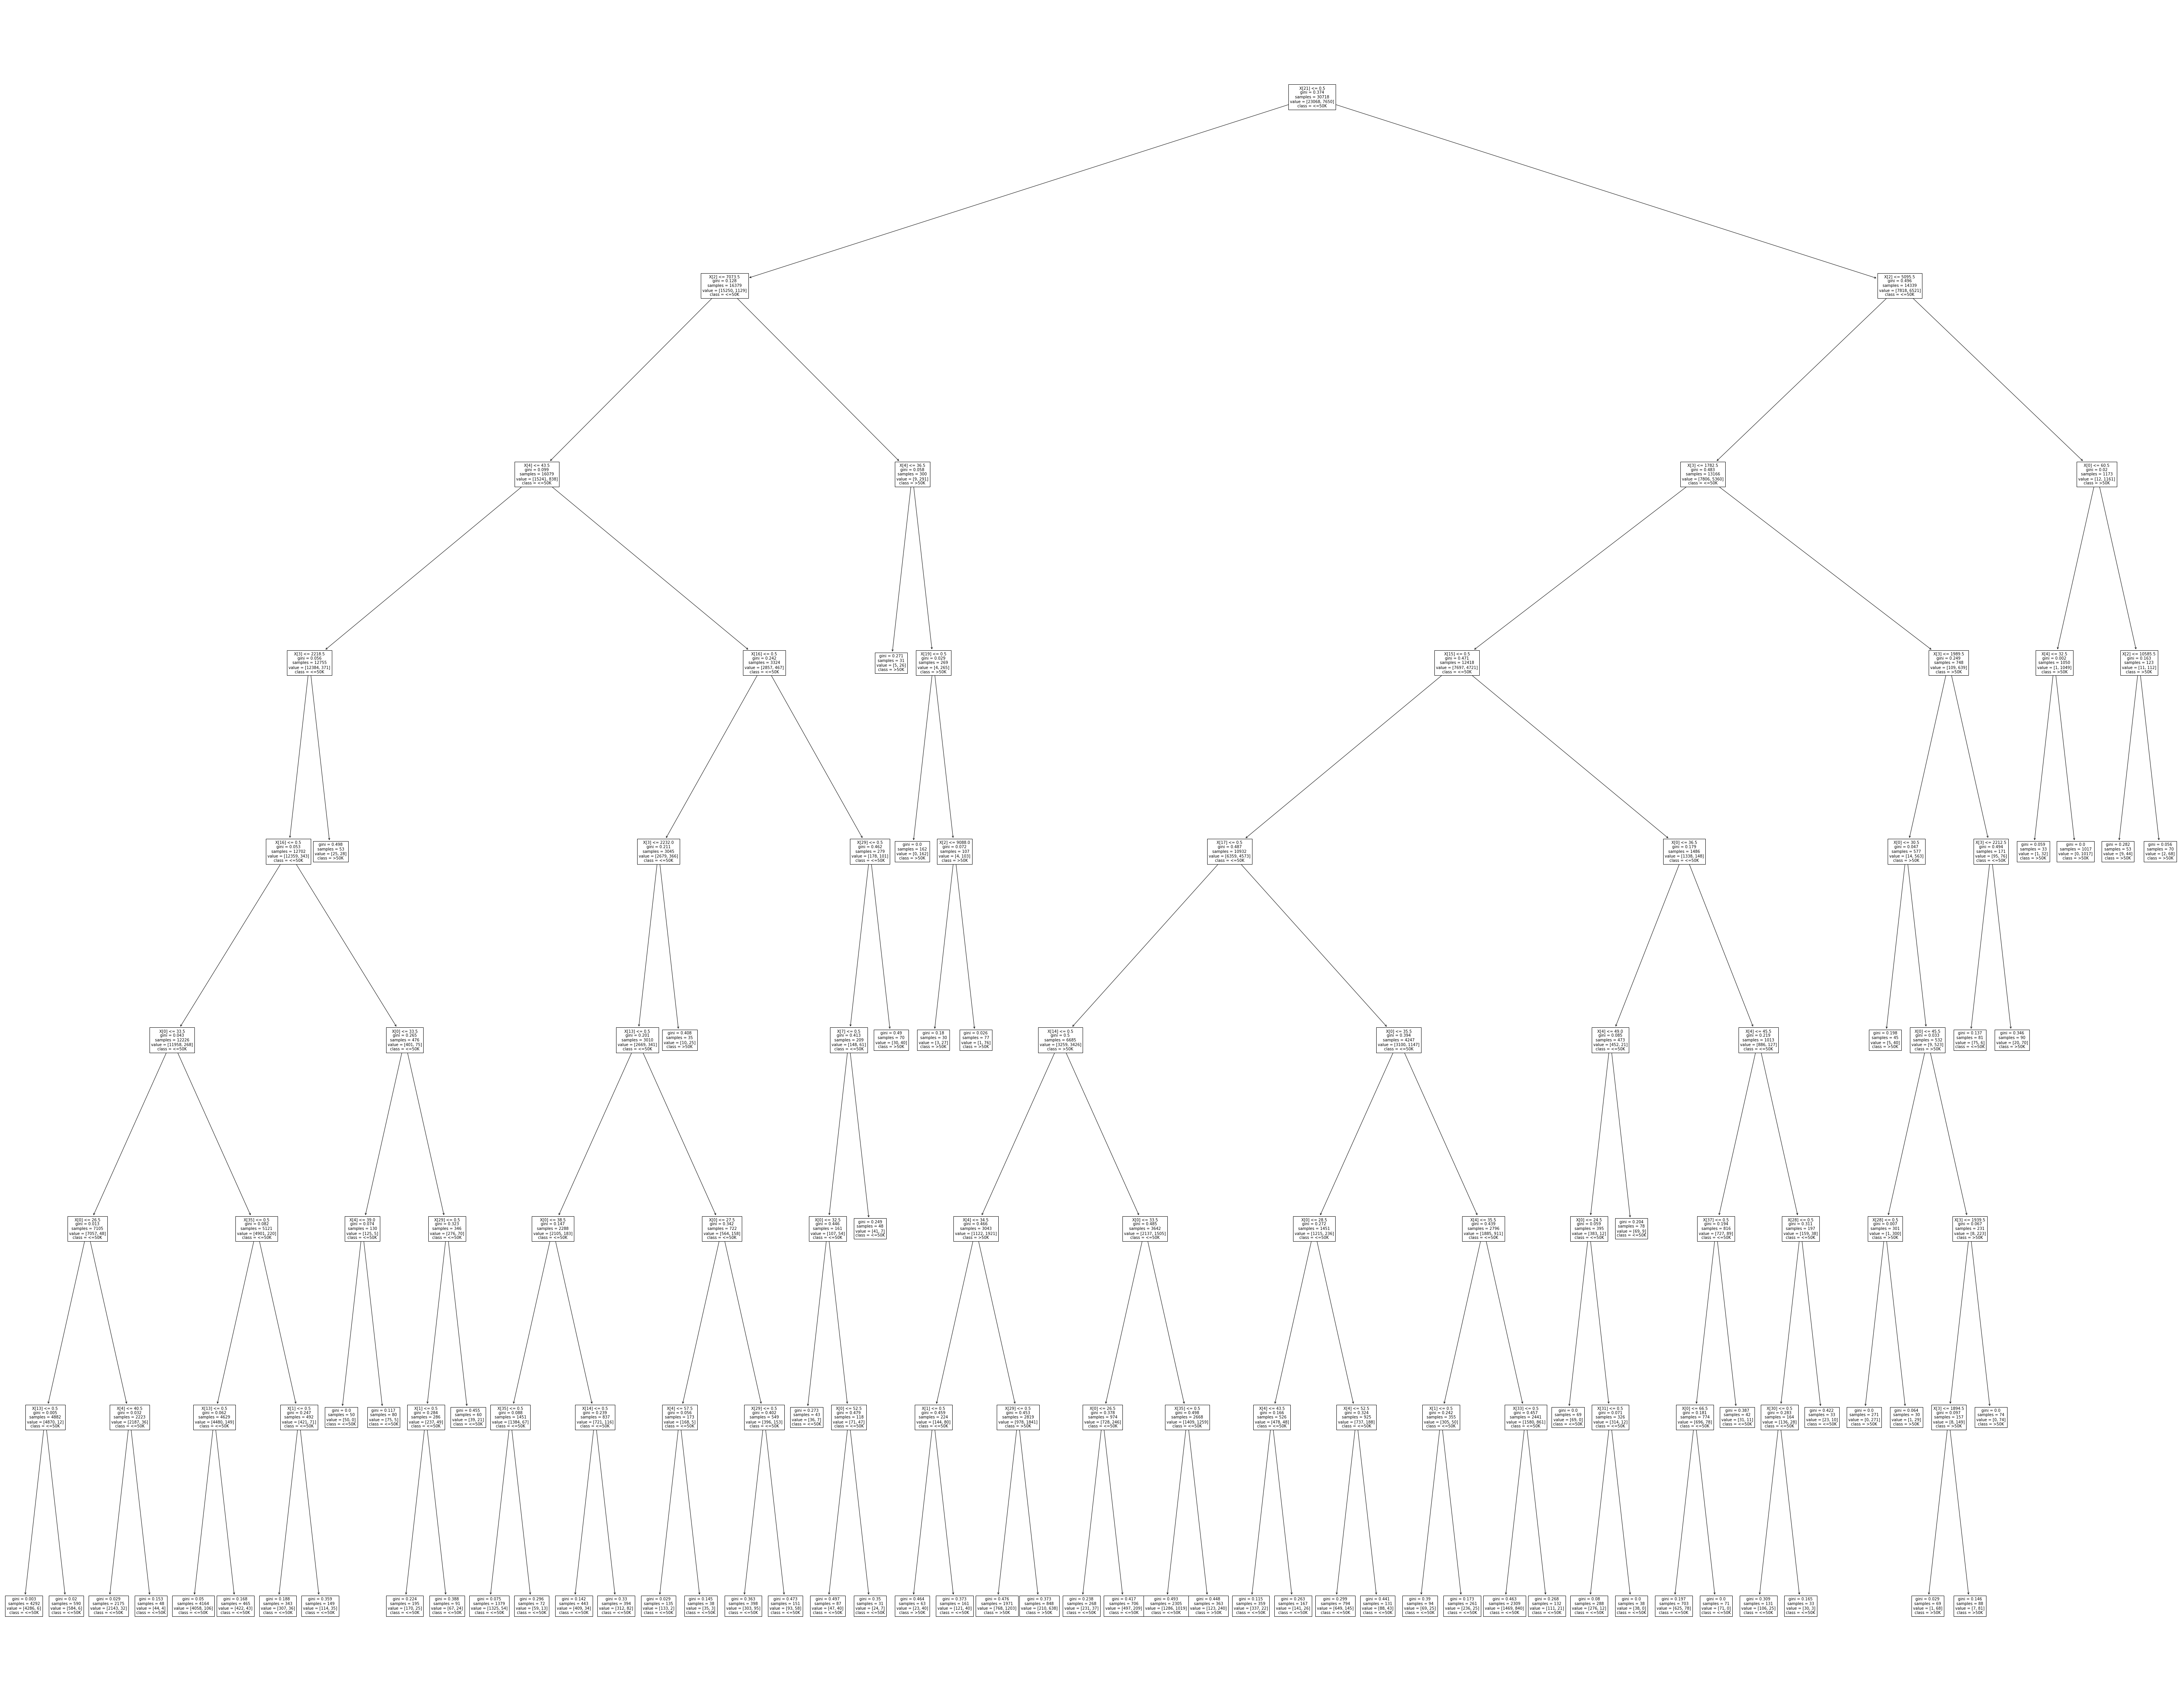

In [7]:
fig=plt.figure(figsize=(100,80))
tree.plot_tree(t2,  class_names = ["<=50K", ">50K"] ,fontsize = 10)

## 3 $k$-means clustering
This problem uses the data generated from 4 normal distributions for applying $k$-means clustering. 
k-means implemented in sci-kit learn can assign initial centeroids through ‘init’. When init is set as $c$ by $p$ array ($c$ = the number of clusters, $p$ = the number of features), each row is used as a centroid.


In [2]:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt
from numpy import random

X,y=datasets.make_blobs(n_samples=500, n_features=2, cluster_std=1, random_state=68, centers=4)

(1) Select randomly 4 samples from the given data set and use them as initial centroids. This procedure is repeated for 100 times. Then, calculate the average values of the silhouette coefficient and adjusted rand index values for 100 iteration. 

In [3]:
X1 = X.tolist()
y1 = y.tolist()

silhouette1 = [] #list to save values of the silhouette coefficient
adjusted1 = [] # list to save values of adjusted rand index values
randomnum1 = [] #list to save randome initial centroids.


for i in range(100):
    while(True):
        ran1 = random.randint(0,500)   #make random number
        ran2 = random.randint(0,500)
        ran3 = random.randint(0,500)
        ran4 = random.randint(0,500)
        if(ran1 != ran2 != ran3 != ran4):
            break
    

    listX1 = X[0:4]    #make a ndarray size 4

    ran1 = X1[ran1]    #make a random initial centroids choosed at data
    ran2 = X1[ran2]
    ran3 = X1[ran3]
    ran4 = X1[ran4]

    listX1[0] = ran1
    listX1[1] = ran2
    listX1[2] = ran3
    listX1[3] = ran4

    randomnum1.append(ran1) 
    randomnum1.append(ran2)
    randomnum1.append(ran3)
    randomnum1.append(ran4)

    
    kmeans1 = KMeans(n_clusters = 4, init = listX1, max_iter = 100, algorithm='auto', random_state=0, n_init=1)
    kmeans1.fit(X1)

    y_predict1 = kmeans1.fit_predict(X1)

    silhouette1.append(silhouette_score(X1, y_predict1))
    adjusted1.append(adjusted_rand_score(y1, y_predict1))

#print(randomnum1)
print('average of silhouette_score is \n' , sum(silhouette1) / len(silhouette1))
print('averave of adjusted_rand_score is \n' , sum(adjusted1) / len(adjusted1))

#select and save worst initial centroids
silhouette1_min_index = silhouette1.index(min(silhouette1))  
worst_data1 = []
for i in range(4):
    worst_data1.append(randomnum1[4 * silhouette1_min_index + i])

print(worst_data1)
"""
군집들이 얼마나 떨어져있는지 - 군집내에서 얼마나 모여져있는지 => 이걸 스케일링 해서 평균화 0.5 이상이면 오케이

랜드지수는 0부터 1까지의 값을 가지고 1이 가장 좋은 성능을 뜻한다. 랜드지수의 문제점은 무작위로 군집화을 한 경우에도 
어느 정도 좋은 값이 나올 가능성이 높다는 점이다. 즉 무작위 군집화에서 생기는 랜드지수의 기댓값이 너무 크다. 
이를 해결하기 위해 무작위 군집화에서 생기는 랜드지수의 기댓값을 원래의 값에서 빼서 
기댓값과 분산을 재조정한 것이 조정 랜드지수(adjusted Rand index, ARI)다.
"""

average of silhouette_score is 
 0.5597973119012489
averave of adjusted_rand_score is 
 0.8590649853709982
[[2.4988954645765267, -7.176178809570235], [2.786462127883523, -3.3518997586550796], [-5.445466877911624, -9.91145122482799], [-5.452640038246109, -8.12486622217665]]


'\n군집들이 얼마나 떨어져있는지 - 군집내에서 얼마나 모여져있는지 => 이걸 스케일링 해서 평균화 0.5 이상이면 오케이\n\n랜드지수는 0부터 1까지의 값을 가지고 1이 가장 좋은 성능을 뜻한다. 랜드지수의 문제점은 무작위로 군집화을 한 경우에도 \n어느 정도 좋은 값이 나올 가능성이 높다는 점이다. 즉 무작위 군집화에서 생기는 랜드지수의 기댓값이 너무 크다. \n이를 해결하기 위해 무작위 군집화에서 생기는 랜드지수의 기댓값을 원래의 값에서 빼서 \n기댓값과 분산을 재조정한 것이 조정 랜드지수(adjusted Rand index, ARI)다.\n'

(2) Select randomly one sample from each normal distribution and use them as initial centroids. This procedure is repeated for 100 times. Then, calculate the average values of the silhouette coefficient and adjusted rand index values for 100 iteration. 

In [14]:
X2 = X.tolist()
y2 = y.tolist()


silhouette2 = [] #list to save values of the silhouette coefficient
adjusted2 = [] # list to save values of adjusted rand index values
randomnum2 = [] #list to save randome initial centroids.



for i in range(1):
    a = []
    b = []
    c = []
    d = []
    listX2 = X[0:4]

    for i in range(len(y)): #seperate X for y. Because X is a data from 4 distributions.
        if(y[i] == 0):
            a.append(i)
        elif(y[i] == 1):
            b.append(i)
        elif(y[i] == 2):
            c.append(i)
        elif(y[i] == 3):
            d.append(i)

    ran_a = random.randint(0,len(a)) 
    ran_b = random.randint(0,len(b)) 
    ran_c = random.randint(0,len(c)) 
    ran_d = random.randint(0,len(d)) 

    result_a = a[ran_a]
    result_b = b[ran_b]
    result_c = c[ran_c]
    result_d = d[ran_d]

    ran1 = X2[result_a] # choose a data at distribution '0'
    ran2 = X2[result_b] # choose a data at distribution '1'
    ran3 = X2[result_c] # choose a data at distribution '2'
    ran4 = X2[result_d] # choose a data at distribution '3'
    
    listX2[0] = ran1
    listX2[1] = ran2
    listX2[2] = ran3
    listX2[3] = ran4

    randomnum2.append(ran1)
    randomnum2.append(ran2)
    randomnum2.append(ran3)
    randomnum2.append(ran4)

    kmeans2 = KMeans(n_clusters = 4, init = listX2, max_iter = 100, algorithm='auto', random_state=0, n_init=1)
    kmeans2.fit(X)

    y_predict2 = kmeans2.fit_predict(X2)

    silhouette2.append(silhouette_score(X2, y_predict2))
    adjusted2.append(adjusted_rand_score(y2, y_predict2))
    
#print(randomnum2)
print('average of silhouette_score is \n' , sum(silhouette2) / len(silhouette2))
print('averave of adjusted_rand_score is \n' , sum(adjusted2) / len(adjusted2))


silhouette2_min_index = silhouette2.index(min(silhouette2))
worst_data2 = []
for i in range(4):
    worst_data2.append(randomnum2[4 * silhouette2_min_index + i])

print(worst_data2)


average of silhouette_score is 
 0.5938941422162042
averave of adjusted_rand_score is 
 0.9165019973298444
[[-4.7296881577702825, -9.529528946130343], [1.681098805676508, -8.587004109485415], [1.8795365048599555, -2.5737388634712923], [5.634708166111731, -8.38044787805711]]


(3) Draw a scatter plot for the given data with initial centroids and final centroids for the worst case among 100 trials in Question 3-(1). The initial centroids should be marked as red ‘X’ and the final centroids should be marked as blue ‘X’. 

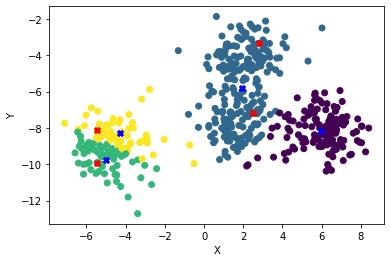

In [4]:
initial_centroids1 = worst_data1
initial_centroids1 = sum(initial_centroids1, [])
initial_centroids_X1 = []
initial_centroids_Y1 = []
for i in range(4):  #make a list x and y to draw wrost initial_centroids
    initial_centroids_X1.append(initial_centroids1[2*i])

for i in range(4):
    initial_centroids_Y1.append(initial_centroids1[2*i + 1])

initial_centroids_2d1 = X[0:4]  #make a ndarray wrost initial_centroids
initial_centroids_2d1[0] = worst_data1[0]
initial_centroids_2d1[1] = worst_data1[1]
initial_centroids_2d1[2] = worst_data1[2]
initial_centroids_2d1[3] = worst_data1[3]

kmeans3 = KMeans(n_clusters = 4, init = initial_centroids_2d1, max_iter = 100, algorithm='auto', random_state=0, n_init=1)    
kmeans3.fit(X)
kmeans_label3 = kmeans3.labels_

plt.scatter(X[:,0], X[:,1], c=kmeans_label3)
plt.scatter(kmeans3.cluster_centers_[:,0],
           kmeans3.cluster_centers_[:,1],
           c = 'blue', marker = 'X'
           )
plt.scatter(initial_centroids_X1,initial_centroids_Y1,
            c = 'red', marker = 'X')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


(4) Draw a scatter plot for the worst case of Question 3-(2) in the same way as in Question 3-(3).  

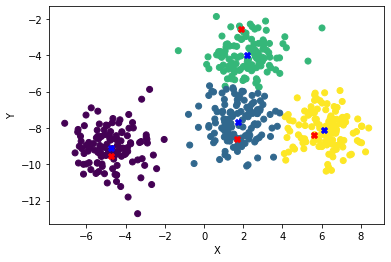

In [18]:
initial_centroids2 = worst_data2
initial_centroids2 = sum(initial_centroids2, [])
initial_centroids_X2 = []
initial_centroids_Y2 = []
for i in range(4):  #make a list x and y to draw wrost initial_centroids
    initial_centroids_X2.append(initial_centroids2[2*i])

for i in range(4):
    initial_centroids_Y2.append(initial_centroids2[2*i + 1])

initial_centroids_2d2 = X[0:4] #make a ndarray wrost initial_centroids
initial_centroids_2d2[0] = worst_data2[0]
initial_centroids_2d2[1] = worst_data2[1]
initial_centroids_2d2[2] = worst_data2[2]
initial_centroids_2d2[3] = worst_data2[3]

kmeans4 = KMeans(n_clusters = 4, init = initial_centroids_2d2, max_iter = 100, algorithm='auto', random_state=0, n_init=1)    
kmeans4.fit(X)
kmeans_label4 = kmeans4.labels_

plt.scatter(X[:,0], X[:,1], c=kmeans_label4)
plt.scatter(kmeans4.cluster_centers_[:,0],
           kmeans4.cluster_centers_[:,1],
           c = 'blue', marker = 'X'
           )
plt.scatter(initial_centroids_X2,initial_centroids_Y2,
            c = 'red', marker = 'X')

plt.xlabel('X')
plt.ylabel('Y')

plt.show()